**Penjelasan Atribut**
>
1. InvoiceNo : Nomor faktur. Nomor unik yang diberikan untuk setiap transaksi. Jika kode ini dimulai dengan huruf 'c', itu berarti pembatalan.
2. StockCode : Kode produk. Nomor unik untuk setiap produk.
3. Description : Nama produk
4. Quantity : Jumlah setiap produk (item) per transaksi.
5. InvoiceDate : Tanggal dan waktu setiap transaksi.
6. UnitPrice : Harga per satuan produk.
7. CustomerID : Nomor unik untuk setiap pelanggan
8. Country : Nama negara tempat pelanggan tinggal.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

##**Load Dataset**

# Preprocessing Data

In [ ]:
#melakukan pembacaan data dengan format CSV
df = pd.read_csv('ecommerce_data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


##Data Cleaning
**Pemeriksaan Missing Value**

In [ ]:
#  1. Check for missing values
# jumlah bilangan nol tiap atributnya
df.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

In [ ]:
# Melakukan reduksi data yang memiliki missing value
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Memastikan bahwa tidak ada lagi missing value pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  float64
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB


##Data Transformation
**Pengubahan tipe data**

In [ ]:
# mengubah tipe data quantity menjadi integer
df['Quantity']=df['Quantity'].astype(np.int64)
df.info()

<ipython-input-214-690a52dba3bd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  int64  
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      403182 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.7+ MB


In [ ]:
# mengubah tipe data CustomerID menjadi string
df['CustomerID']=df['CustomerID'].astype('str')
df.info()

<ipython-input-215-bb4ae8743f81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  int64  
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  object 
 7   Country      403182 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.7+ MB


In [ ]:
#Menghapus (,0) pada CustomerID
df['CustomerID'] = df['CustomerID'].str[:-2]
df.head(10)

<ipython-input-216-59c2bd7ec82e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [ ]:
# mengubah tipe data InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<ipython-input-218-5197f6425789>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    403182 non-null  object        
 1   StockCode    403182 non-null  object        
 2   Description  403182 non-null  object        
 3   Quantity     403182 non-null  int64         
 4   InvoiceDate  403182 non-null  datetime64[ns]
 5   UnitPrice    403182 non-null  float64       
 6   CustomerID   403182 non-null  object        
 7   Country      403182 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.7+ MB


##Data Reduction
**Melakukan reduksi untuk mengurangi kompleksitas data**

In [ ]:
#Reduksi data Quantity yang bernilai kurang dari nol
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [ ]:
df = df[df['Quantity']>0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
#Reduksi UnitPrice yang bernilai kurang atau sama dengan nol
print(len(df[df['UnitPrice']<=0]))

40


##Adding the columns

In [ ]:
# Pembuatan kolom baru TotalPrice
df['TotalPrice']=df['Quantity']*df['UnitPrice']
df.head(10)

<ipython-input-222-831310ade912>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
dtype: object

In [ ]:
# Penambahan kolom Year, Month, Day, Hour dan Month Year berdasarkan kolom InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month Year'] = df['InvoiceDate'].dt.to_period('M')
df.head(10)

<ipython-input-224-7c98e28ea04a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Month Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,2010,12,1,8,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,2010,12,1,8,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,8,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,8,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,8,2010-12


#Exploratory Data Analysis (EDA)

##Analyze unit prices of the items

Text(0, 0.5, 'Total Penjualan')

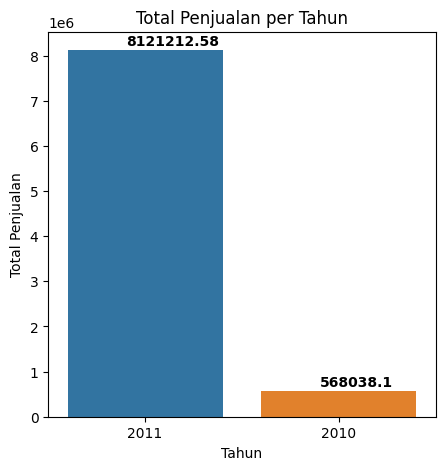

In [ ]:
# Jumlah penjualan berdasarkan tahun
df['Year'] = df['Year'].astype('str')
plt.figure(figsize=(5,5))
d = df.groupby('Year')['TotalPrice'].sum().sort_values(ascending=False)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i-.1, v+100000, str(round(v, 2)), color='black', fontweight='bold')
plt.title('Total Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')

Text(0.5, 1.0, 'Total Price by Description')

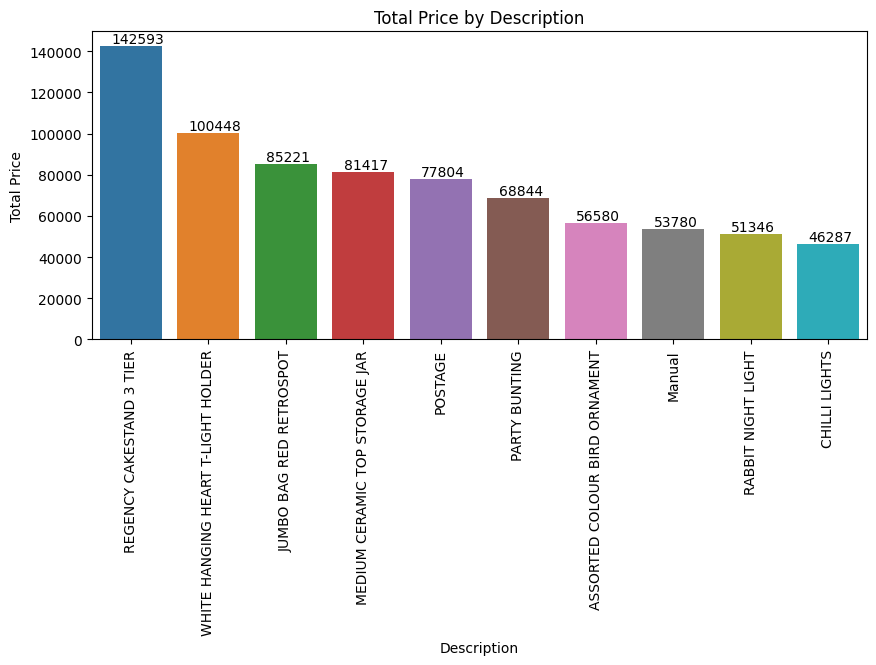

In [ ]:
# Membuat bar chart berdasarkan penjualan produk tertinggi (10 produk saja)
plt.figure(figsize=(10,4))
d = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i-.25, v+1500, str(round(v)), color='black')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.ylabel('Total Price')
plt.title('Total Price by Description')

Text(0.5, 1.0, 'Average of Unit Price by Description in 2010')

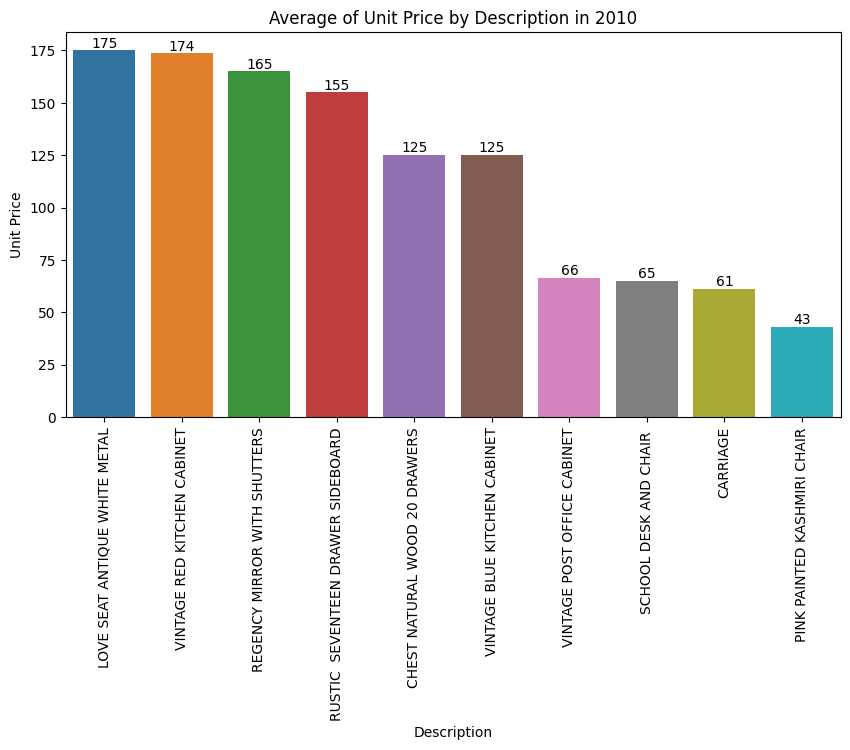

In [ ]:
# Membuat sumbu x sebagai deskripsi dan sumbu y sebagai unit price di tahun 2010
plt.figure(figsize=(10,5))
d = df[df['Year']=='2010'].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(round(v)), color='black', va='bottom', ha='center')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')
plt.title('Average of Unit Price by Description in 2010')

Text(0.5, 1.0, 'Average of Unit Price by Description in 2011')

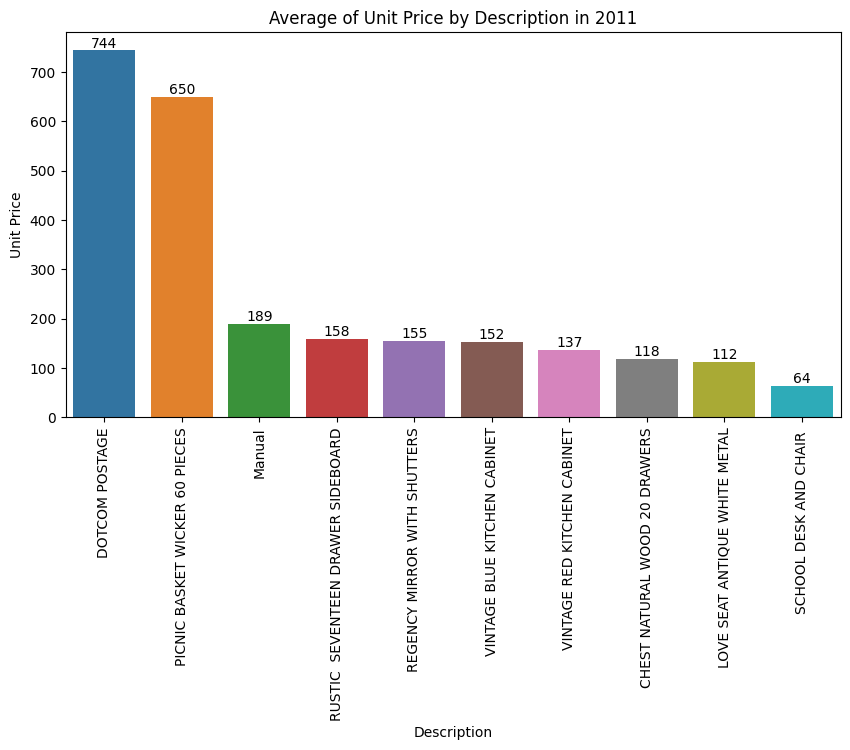

In [ ]:
# Membuat sumbu x sebagai deskripsi dan sumbu y sebagai unit price di tahun 2011
plt.figure(figsize=(10,5))
d = df[df['Year']=='2011'].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(round(v)), color='black', va='bottom', ha='center')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')
plt.title('Average of Unit Price by Description in 2011')

Text(0.5, 1.0, 'Average of Unit Price by Description')

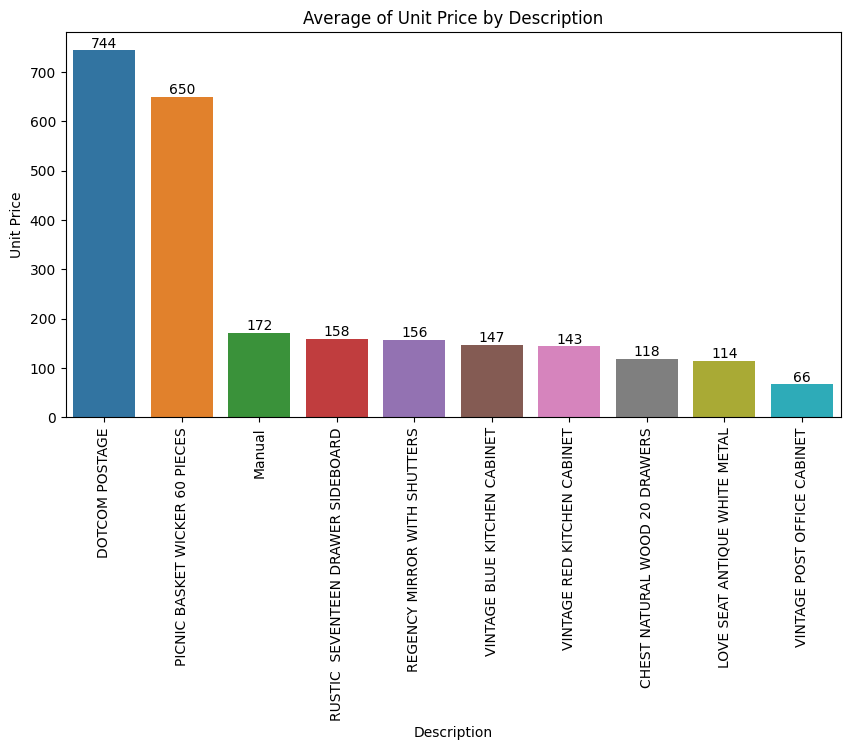

In [ ]:
# Membuat sumbu x sebagai deskripsi dan sumbu y sebagai unit price
plt.figure(figsize=(10,5))
d = df.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(round(v)), color='black', va='bottom', ha='center')
plt.xlabel('Description')
plt.xticks(rotation=90)
plt.ylabel('Unit Price')
plt.title('Average of Unit Price by Description')

##Analyze per country

In [ ]:
# membuat barchart sumbu x country dan sumbu y total number orders
orders_by_country = df.groupby('Country')['InvoiceNo'].nunique().reset_index(name='num_orders')
orders_by_country = orders_by_country.sort_values('num_orders', ascending=False)

# Create a bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=orders_by_country['Country'],
            y=orders_by_country['num_orders'],
            ))
fig.update_layout(title='Total Number of Orders by Country', xaxis_title='Countries', yaxis_title='Number of Orders')
fig.show()


In [ ]:
orders_by_country = orders_by_country[orders_by_country['Country'] != 'United Kingdom']
orders_by_country = orders_by_country.sort_values('num_orders', ascending=False)

# Create a bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=orders_by_country['Country'],
            y=orders_by_country['num_orders'],
            ))
fig.update_layout(title='Total Number of Orders by other Countries', xaxis_title='Countries', yaxis_title='Number of Orders')
fig.show()

In [ ]:
money_spent_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
money_spent_by_country = money_spent_by_country.sort_values('TotalPrice', ascending=False)


# Create a bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=money_spent_by_country['Country'],
            y=money_spent_by_country['TotalPrice'],
            ))
fig.update_layout(title='Total Spending by Country', xaxis_title='Countries', yaxis_title='Total Spending')
fig.show()

In [ ]:
money_spent_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()
money_spent_by_country = money_spent_by_country.sort_values('TotalPrice', ascending=False)
money_spent_by_country = money_spent_by_country[money_spent_by_country['Country'] != 'United Kingdom']

# Create a bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=money_spent_by_country['Country'],
            y=money_spent_by_country['TotalPrice'],
            ))
fig.update_layout(title='Total spending by other Countries', xaxis_title='Countries', yaxis_title='Total Price')
fig.show()

## Analyze repeat customers



Text(0.5, 1.0, 'Total Price by Customer ID')

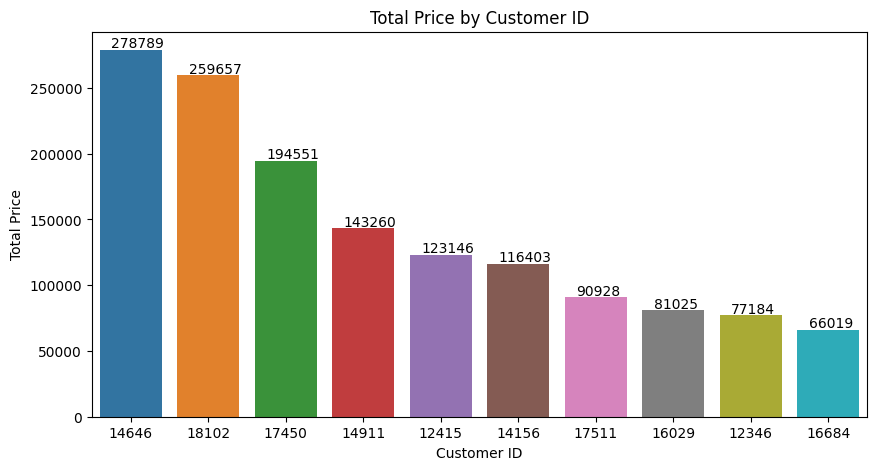

In [ ]:
# Membuat chart di grup dengan customer id
plt.figure(figsize=(10,5))
d = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i-.25, v+1700, str(round(v)), color='black')
plt.xlabel('Customer ID')
plt.ylabel('Total Price')
plt.title('Total Price by Customer ID')


In [ ]:
# Menampilkan berapa kali customer melakukan pembelian beserta total pembelian
dfCount = df['CustomerID'].value_counts().reset_index()
dfCount['total'] = df.groupby('CustomerID')['TotalPrice'].sum().values
dfCount.columns = ['CustomerID', 'Count', 'TotalPrice']
dfCount.sort_values(by='Count', ascending=False).head(10)

,CustomerID,Count,TotalPrice
0,17841,7755,77183.60
1,14911,5636,4299.80
2,14096,5021,1797.24
3,12748,4556,1757.55
4,14606,2587,334.40
5,15311,2349,2506.04
6,14646,2065,89.00
7,13089,1793,1079.40
8,13263,1641,459.40
9,14298,1593,2811.43


In [ ]:
# Menampilkan ID dengan Kuantitas pembelian terbanyak
df.groupby('CustomerID')['Quantity', 'TotalPrice'].sum().sort_values(by='Quantity', ascending=False).head(10)

<ipython-input-236-f572b0287002>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Quantity,TotalPrice
CustomerID,,
14646,195715,278788.58
14911,79884,143260.39
12415,75654,123146.21
12346,74215,77183.60
17450,69993,194550.79
17511,64213,90927.50
18102,64124,259657.30
13694,62856,64717.30
14156,56488,116403.28


###Calculation RFM Metrics
RFM (Rencency, Frequency, Monetary)


* merupakan salah satu metode analisis
* Analisis RFM merupakan salah satu teknik yang digunakan untuk segmentasi pelanggan
* Memungkinkan untuk membagi pelanggan menjadi kelempok tertentu berdasarkan dari kebiasaan belanja dan digunakan untuk mengembangkan strategi yang spesifik untuk masing-masing kelompok.

 **RFM Metrics**
*Recency : Kapan ketika pelanggan terakhir kali berbelanja. Apabila transaksi terjadi baru-baru ini maka nilai recency semakin tinggi.
*Frequency: Sesering apakah pelanggan melakukan transaksi pada periode tertentu. Apabila semakin sering terjadinya transaksi maka nilai frequency semakin tinggi.
* Monetary: Nilai moneter atau seberapa banyak jumlah uang yang dikeluarkan pelanggan untuk berbelanja. Apabila semakin banyak total transaksi maka nilai monetary semakin tinggi.



In [ ]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# +2 days are added to the last order day and the analysis day is determined

today_date = dt.datetime(2011, 12, 11)

In [ ]:
# Kalkulasi dari Recency, Frequency dan Monetary values

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': 'sum',
                                     'Description': 'sum'})

In [ ]:
rfm.columns = ["recency", "frequency", "monetary", "description"]
rfm.head()

,recency,frequency,monetary,description
CustomerID,,,,
12346,326,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR
12347,3,7,4299.80,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348,76,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349,19,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350,311,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...


In [ ]:
# hanya diperlukan skor monetary yang lebih dari 0

rfm = rfm[rfm["monetary"] >0]

###RFM SCORES

In [ ]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"]       = (rfm['recency_score'].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str))
rfm["RFM_TOTAL"]       = (rfm['recency_score'].astype(int) + rfm["frequency_score"].astype(int) + rfm["monetary_score"].astype(int))

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE,RFM_TOTAL
CustomerID,,,,,,,,,
12346,326,1,77183.60,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,115,7
12347,3,7,4299.80,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,555,15
12348,76,4,1797.24,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,244,10
12349,19,1,1757.55,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,414,9
12350,311,1,334.40,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,112,4


###SEGMENTATION

In [ ]:
rfm["RFM_TOTAL"].sort_values(ascending=False).unique()

array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3])

In [ ]:
# Membuat kondisi berdasarkan RFM total
def classify_cust(df):
    # Membuat kondisi berdasarkan RFM total
    if df['RFM_TOTAL'] == 15:
        return "Very High Value Customer"
    elif df['RFM_TOTAL'] == 14:
        return "High Value Customer"
    elif df['RFM_TOTAL'] == 13:
        return "Medium-High Value Customer"
    elif df['RFM_TOTAL'] >= 10 and df['RFM_TOTAL'] <= 12:
        return "Medium Value Customer"
    elif df['RFM_TOTAL'] >= 7 and df['RFM_TOTAL'] <= 9:
        return "Low Value Customer"
    elif df['RFM_TOTAL'] >= 4 and df['RFM_TOTAL'] <= 6:
        return "Very Low Value Customer"
    elif df['RFM_TOTAL'] >= 1 and df['RFM_TOTAL'] <= 3:
        return "Lost Customer"
    else:
        return "Invalid RFM Value"

**Condition Explanation**
1.   Jika skor RFM TOTAL sama dengan 15 maka termasuk kelas Very High Value Customer
2.   Jika skor RFM TOTAL sama dengan 14 maka termasuk kelas High Value Customer
3.   Jika skor RFM TOTAL sama dengan 13 maka termasuk kelas Medium-High Value Customer
4.   Jika skor RFM TOTAL sama dengan 10 maka termasuk kelas Medium Value Customer
5.   Jika skor RFM TOTAL sebesar 7 sampai 9 maka termasuk kelas Low Value Customer
6.   Jika skor RFM TOTAL sebesar 4 sampai 6 maka termasuk kelas Very Low Value Customer
7.   Jika skor RFM TOTAL sebesar 1 sampai 3 maka termasuk kelas Lost Customer

Apabila terdapat customer ID yang tidak memiliki skor maka akan termasuk kelas Invalid RFM Value

In [ ]:
#Mereduksi kolom REM_SCORE dan description
rfm = rfm.drop(['RFM_SCORE', 'description'], axis=1)
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_TOTAL
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,7
12347,3,7,4299.80,5,5,5,15
12348,76,4,1797.24,2,4,4,10
12349,19,1,1757.55,4,1,4,9
12350,311,1,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280,278,1,180.60,1,2,1,4
18281,181,1,80.82,1,2,1,4
18282,8,2,178.05,5,3,1,9


In [ ]:
#Menambahkan kolom CustSegmentation
rfm['Segmentation'] = rfm.apply(classify_cust, axis=1)
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_TOTAL,Segmentation
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,5,7,Low Value Customer
12347,3,7,4299.80,5,5,5,15,Very High Value Customer
12348,76,4,1797.24,2,4,4,10,Medium Value Customer
12349,19,1,1757.55,4,1,4,9,Low Value Customer
12350,311,1,334.40,1,1,2,4,Very Low Value Customer
...,...,...,...,...,...,...,...,...
18280,278,1,180.60,1,2,1,4,Very Low Value Customer
18281,181,1,80.82,1,2,1,4,Very Low Value Customer
18282,8,2,178.05,5,3,1,9,Low Value Customer


In [ ]:
#Menghitung berapa banyak pelanggan tiap segmennya
rfm["Segmentation"].value_counts()

Very Low Value Customer       1128
Low Value Customer            1088
Medium Value Customer         1002
Very High Value Customer       354
High Value Customer            296
Medium-High Value Customer     288
Lost Customer                  180
Name: Segmentation, dtype: int64

In [ ]:
#Visualization
fig=px.histogram(rfm,x="Segmentation",template="plotly",
                color_discrete_sequence=[px.colors.sequential.thermal_r],
                title="Distribution of Segment",text_auto=".2f")
fig.update_layout(yaxis_title="Count",xaxis={"categoryorder":"total ascending"})

In [ ]:
fig=px.histogram(rfm,y="Segmentation",template="plotly",
                color_discrete_sequence=[px.colors.sequential.thermal_r],
                title="Distribution of Segment %",text_auto=".2f",
                histnorm="percent")
fig.update_layout(yaxis={"categoryorder":"total ascending"})

fig

In [ ]:
fig=px.histogram(rfm,x="Segmentation",color="monetary_score",y="monetary",
                template="plotly",color_discrete_sequence=px.colors.sequential.thermal_r,barmode="group",
                histnorm="percent",title="Distribution of Monetary score by Segment %")
fig.update_layout(yaxis_title="Percent of Sum of Monetary",
                  font=dict(size=14,family="Franklin Gothic"))

In [ ]:
rfm[["Segmentation","recency","frequency","monetary"]].groupby("Segmentation").agg(["mean", "max","count"])

recency             frequency             \
                                  mean  max count       mean  max count   
Segmentation                                                              
High Value Customer          16.304054   33   296   9.016892   51   296   
Lost Customer               287.611111  374   180   1.000000    1   180   
Low Value Customer           86.213235  373  1088   2.011949    7  1088   
Medium Value Customer        43.928144  373  1002   3.859281   34  1002   
Medium-High Value Customer   24.819444   72   288   6.510417   63   288   
Very High Value Customer      6.141243   15   354  18.183616  210   354   
Very Low Value Customer     177.263298  374  1128   1.158688    3  1128   

                                monetary                   
                                    mean        max count  
Segmentation                                               
High Value Customer          4320.044122  123146.21   296  
Lost Customer                 143.323444     243.22   180  
Low Value Customer            814.507741   77183.60  1088  
Medium Value Customer        1383.199941   12601.83  1002  
Medium-High Value Customer   2954.709097   81024.84   288  
Very High Value Customer    11083.176695  278788.58   354  
Very Low Value Customer       299.794212    1784.71  1128

###Conclussion
berdasarkan hasil, tindakan yang dapat diambil terhadap pelanggan dapat ditentukan.
misalnya, kelompok Very High Value Customer memiliki 354 transaksi dimana ratarata pembelian dilakukan 6 hari yang lalu, rata-rata frekuensi berbelanja adalah 18 hari. Mereka memiliki rata-rata pengeluaran sebesar 278789. Pelanggan dalam kelompok Very High Value Customer menyumbang sebagian besar pendapatan perusahaan. oleh karena itu pendekata yang tepat ialah fokus pada peningkatan kepuasan pelanggan dalam kelompok ini. Promosi yang dipersonalisasi dan sejenisnya kami rasa cocok untuk pelanggan ini. Bisa saja dengan menawarkan diskon, dapat meningkatkan jumlah perbelanjaan dan kepuasan pelanggan.

##Find item trends: count the number of items sold for each product for each period.

In [ ]:
#menampilkan tabel produk yang paling banyak dibeli tiap bulannya
df.groupby(['Month Year', 'Description'])['Quantity'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='Month Year', keep='first')

,Month Year,Description,Quantity
0,2011-01,MEDIUM CERAMIC TOP STORAGE JAR,74215
1,2011-11,ASSTD DESIGN 3D PAPER STICKERS,12551
3,2011-04,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10224
5,2011-10,WORLD WAR 2 GLIDERS ASSTD DESIGNS,8174
6,2011-05,SMALL POPCORN HOLDER,6738
7,2011-08,ASSORTED COLOUR BIRD ORNAMENT,6425
13,2011-12,POPCORN HOLDER,5362
18,2010-12,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5139
21,2011-03,JUMBO BAG RED RETROSPOT,4924
22,2011-07,GIRLS ALPHABET IRON ON PATCHES,4896


In [ ]:
# group by yearmonth and count the number of unique invoices
orders_by_month = df.groupby('Month Year')['InvoiceNo'].nunique().reset_index()

# create a line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=orders_by_month['Month Year'].apply(lambda x: x.strftime('%m-%Y')), y=orders_by_month['InvoiceNo'], mode='lines'))
fig.update_layout(title='Total Number of Orders by Month', xaxis_title='Month', yaxis_title='Number of Orders')
fig.show()

Text(0, 0.5, 'Total Income')

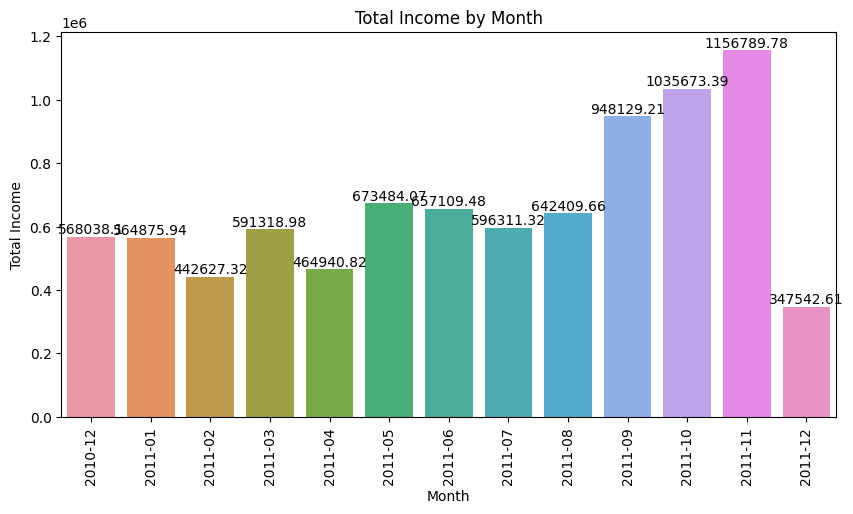

In [ ]:
#membuat sumbu x sebagai month dan sumbu y sebagai total price
plt.figure(figsize=(10,5))
d = df.groupby('Month Year')['TotalPrice'].sum()
sns.barplot(x=d.index, y=d.values)
for i, v in enumerate(d.values):
    plt.text(i, v, str(round(v, 2)), color='black', va='bottom', ha='center')
plt.title('Total Income by Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Total Income')
